In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as sts
import glob
paths= glob.glob("remps/10k_samples/*/progress.csv")
paths

['remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0020001/progress.csv',
 'remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0045001/progress.csv',
 'remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0055001/progress.csv',
 'remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0030001/progress.csv',
 'remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0010001/progress.csv',
 'remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0075001/progress.csv',
 'remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0065001/progress.csv',
 'remps/10k_samples/chain-n-actions2-omega0.8-traj10000-DualReg0.0PolReg-0.0TrainingSet500exact10eps-0.0040001/progres

In [15]:
max_rets = []
eps = []
primals = []
for p in paths:
    df = pd.read_csv(p)
    max_rets.append(np.max(df.ReturnsMean))
    eps.append(df.Epsilon[0])
    primals.append(np.max(df.Primal))

In [16]:
idx = np.argsort(eps)
eps = np.array(eps)[idx]
max_rets = np.array(max_rets)[idx]
primals = np.array(primals)[idx]

In [6]:
primals

array([ 7.66954973, 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.  

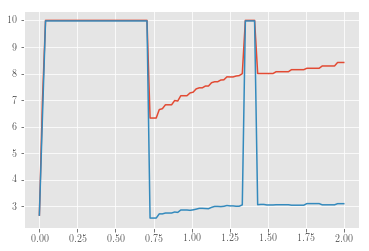

In [17]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.close('all')
plt.style.use('ggplot')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.close('all')
plt.style.use('ggplot')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


from scipy.interpolate import interp1d
from scipy import interpolate

f2 = interp1d(eps, max_rets,kind='nearest')
xnew = np.linspace(eps.min(),eps.max(), 100) #300 represents number of points to make between T.min and T.max
ret_new = f2(xnew)
f3 = interp1d(eps, primals, kind='nearest')
primal_new = f3(xnew)

plt.plot(xnew,primal_new, xnew, ret_new/500)
to_save = np.hstack((np.reshape(xnew,(-1,1)),np.reshape(ret_new/500, (-1,1)), np.reshape(primal_new, (-1,1))))
np.savetxt("remps_J_eps_10k.csv", to_save, delimiter=',', header="epsilon,J,primal", comments="")

In [12]:
eps

array([0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701, 0.0801,
       0.0901, 0.1001, 0.1101, 0.1201, 0.1301, 0.1401, 0.1501, 0.1601,
       0.1701, 0.1801, 0.1901, 0.2001, 0.2101, 0.2201, 0.2301, 0.2401,
       0.2501, 0.2601, 0.2701, 0.2801, 0.2901, 0.3001, 0.3101, 0.3201,
       0.3301, 0.3401, 0.3501, 0.3601, 0.3701, 0.3801, 0.3901, 0.4001,
       0.4101, 0.4201, 0.4301, 0.4401, 0.4501, 0.4601, 0.4701, 0.4801,
       0.4901, 0.5001, 0.5101, 0.5201, 0.5301, 0.5401, 0.5501, 0.5601,
       0.5701, 0.5801, 0.5901, 0.6001, 0.6101, 0.6201, 0.6301, 0.6401,
       0.6501, 0.6601, 0.6701, 0.6801, 0.6901, 0.7001, 0.7101, 0.7201,
       0.7301, 0.7401, 0.7501, 0.7601, 0.7701, 0.7801, 0.7901, 0.8001,
       0.8101, 0.8201, 0.8301, 0.8401, 0.8501, 0.8601, 0.8701, 0.8801,
       0.8901, 0.9001, 0.9101, 0.9201, 0.9301, 0.9401, 0.9501, 0.9601,
       0.9701, 0.9801, 0.9901, 1.0001, 1.0101, 1.0201, 1.0301, 1.0401,
       1.0501, 1.0601, 1.0701, 1.0801, 1.0901, 1.1001, 1.1101, 1.1201,
      